# 201710758 김진성 13주차 과제

In [12]:
import pandas as pd
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

# (1) DataFrame 생성 

In [5]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

In [46]:
iris_df = spark.createDataFrame(iris)

In [47]:
iris_df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



# (2) 회귀선 그래프

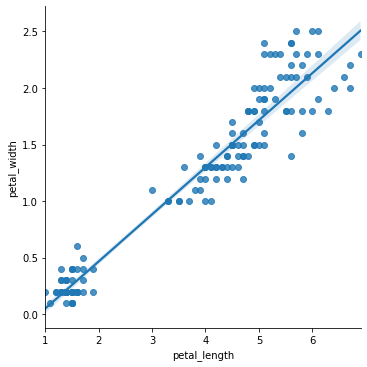

In [48]:
import seaborn as sns

sns.lmplot(x="petal_length", y="petal_width", data=iris)

# (3) Spark를 사용하여 회귀분석하고 계수 출력 

In [57]:
trainDf, testDf = iris_df.randomSplit([0.7, 0.3])

In [58]:
from pyspark.ml.feature import VectorAssembler

vector = VectorAssembler(inputCols=["petal_length"], outputCol="features")
vaDf = vector.transform(trainDf)

In [56]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = "features", labelCol="petal_width")

In [59]:
lr_model = lr.fit(vaDf)

In [63]:
print("Coefficients: {}".format(lr_model.coefficients))
print("Intercept: {}".format(lr_model.intercept))

Coefficients: [0.4147822082699956]
Intercept: -0.36992753349364094


# (4) 실제와 예측 출력

In [65]:
teDf = vector.transform(testDf)

predictions = lr_model.transform(teDf)

In [66]:
predictions.show()

+------------+-----------+------------+-----------+---------------+--------+--------------------+
|sepal_length|sepal_width|petal_length|petal_width|        species|features|          prediction|
+------------+-----------+------------+-----------+---------------+--------+--------------------+
|         4.6|        3.1|         1.5|        0.2|    Iris-setosa|   [1.5]| 0.25224577891135247|
|         4.6|        3.6|         1.0|        0.2|    Iris-setosa|   [1.0]|0.044854674776354686|
|         4.8|        3.0|         1.4|        0.1|    Iris-setosa|   [1.4]| 0.21076755808435288|
|         4.9|        3.1|         1.5|        0.1|    Iris-setosa|   [1.5]| 0.25224577891135247|
|         5.0|        3.0|         1.6|        0.2|    Iris-setosa|   [1.6]| 0.29372399973835206|
|         5.0|        3.2|         1.2|        0.2|    Iris-setosa|   [1.2]|  0.1278111164303538|
|         5.0|        3.6|         1.4|        0.2|    Iris-setosa|   [1.4]| 0.21076755808435288|
|         5.1|      

In [67]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="rmse")

In [68]:
rmse=evaluator.evaluate(predictions)

In [69]:
rmse

0.2080342109354934

# 0.2 정도의 rmse를 가지는 것으로 보아, 잘 예측 한 것을 확인 할 수 있었습니다!